# Ford GoBike Exploratory Analysis

## Import Requirements:

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Load the Master Dataset

In [31]:
df = pd.read_csv('/Users/mattames/Desktop/ford_gobike/all_bikeshare_datasets/cleaned_datasets/master-dataset-v2.csv')

In [32]:
df.head()

,bike_id,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,user_type,bike_share_for_all_trip,member_gender,member_birth_year
0,1035,598,2018-02-28 23:59:47.097,2018-03-01 00:09:45.187,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114,Rhode Island St at 17th St,37.764478,-122.402570,Subscriber,No,Male,1988
1,1673,943,2018-02-28 23:21:16.495,2018-02-28 23:36:59.974,6,The Embarcadero at Sansome St,37.804770,-122.403234,324,Union Square (Powell St at Post St),37.788300,-122.408531,Customer,No,Male,1987
2,3498,18587,2018-02-28 18:20:55.190,2018-02-28 23:30:42.925,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,Customer,No,Female,1986
3,3129,18558,2018-02-28 18:20:53.621,2018-02-28 23:30:12.450,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,Customer,No,Male,1981
4,1839,885,2018-02-28 23:15:12.858,2018-02-28 23:29:58.608,308,San Pedro Square,37.336802,-121.894090,297,Locust St at Grant St,37.322980,-121.887931,Subscriber,Yes,Female,1976


In [34]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197671 entries, 0 to 3197670
Data columns (total 16 columns):
bike_id                    3197671 non-null int64
duration_sec               3197671 non-null int64
start_time                 3197671 non-null object
end_time                   3197671 non-null object
start_station_id           3197671 non-null int64
start_station_name         3197671 non-null object
start_station_latitude     3197671 non-null float64
start_station_longitude    3197671 non-null float64
end_station_id             3197671 non-null int64
end_station_name           3197671 non-null object
end_station_latitude       3197671 non-null float64
end_station_longitude      3197671 non-null float64
user_type                  3197671 non-null object
bike_share_for_all_trip    3197671 non-null object
member_gender              3197671 non-null object
member_birth_year          3197671 non-null int64
dtypes: float64(4), int64(5), object(7)
memory usage: 390.3+ MB


In [35]:
# Re-convert datetime datatypes
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [36]:
# Confirm change
df.dtypes

bike_id                             int64
duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                    int64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                      int64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
user_type                          object
bike_share_for_all_trip            object
member_gender                      object
member_birth_year                   int64
dtype: object

## Exploratory Analysis & Additional Cleaning

In [37]:
# Check statistics for numerical columns
df.describe()

,bike_id,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,member_birth_year
count,3.197671e+06,3.197671e+06,3.197671e+06,3.197671e+06,3.197671e+06,3.197671e+06,3.197671e+06,3.197671e+06,3.197671e+06
mean,2.709359e+03,7.734795e+02,1.229253e+02,3.776958e+01,-1.223534e+02,1.210837e+02,3.776950e+01,-1.223521e+02,1.983189e+03
std,1.716219e+03,1.971263e+03,1.037837e+02,1.015278e-01,1.357226e-01,1.036002e+02,1.336651e-01,3.128577e-01,1.043911e+01
min,1.000000e+01,6.100000e+01,3.000000e+00,0.000000e+00,-1.224737e+02,3.000000e+00,0.000000e+00,-1.224737e+02,1.878000e+03
25%,1.323000e+03,3.450000e+02,3.600000e+01,3.777106e+01,-1.224117e+02,3.000000e+01,3.777143e+01,-1.224108e+02,1.978000e+03
50%,2.561000e+03,5.430000e+02,9.000000e+01,3.778107e+01,-1.223974e+02,8.900000e+01,3.778127e+01,-1.223971e+02,1.986000e+03
75%,3.756000e+03,8.380000e+02,1.930000e+02,3.779581e+01,-1.222914e+02,1.890000e+02,3.779625e+01,-1.222914e+02,1.991000e+03
max,7.196000e+03,8.628100e+04,4.270000e+02,3.788022e+01,0.000000e+00,4.270000e+02,3.788022e+01,0.000000e+00,2.001000e+03


1. Max duration in seconds appears way too high, a 23 hour bike rental cannot be a legitimate rental (could be someone incorrectly returning the bike? If there's multiple of these trips from the same bikes, do we have broken bikes?). I will need to plot the distribution of ride durations and select a reasonable range to focus on.
2. Min birth year of 1983 would make the rider 141 years old. This must be an error and a reasonable age range will need to be selected and focused on.
3. Station latitudes of 0 would place the stations on the equator. The Bay area coordinates should all be between 37 and 38 for latitude and -121 and -123 for longitude.

### Correct latitude and longitude issues

#### Define
The only station coordinates outside the expected range are for the test station data entry, so there is no filling or adjusting of values to be done. Use .drop() to drop all rows where start_station_name or end_station_name is "SF Test Station".

#### Code

In [40]:
# Start station latitude test lower limit
df.query('start_station_latitude < 37')

,bike_id,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,user_type,bike_share_for_all_trip,member_gender,member_birth_year
265936,1161,175,2019-04-24 16:56:54.516,2019-04-24 16:59:50.429,420,SF Test Station,0.0,0.0,81,Berry St at 4th St,37.77588,-122.39317,Subscriber,No,Male,1983


In [39]:
# Start station latitude test upper limit
df.query('start_station_latitude > 38')

,bike_id,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,user_type,bike_share_for_all_trip,member_gender,member_birth_year


In [46]:
# Start station longitude test lower limit
df.query('start_station_longitude > -121')

,bike_id,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,user_type,bike_share_for_all_trip,member_gender,member_birth_year
265936,1161,175,2019-04-24 16:56:54.516,2019-04-24 16:59:50.429,420,SF Test Station,0.0,0.0,81,Berry St at 4th St,37.77588,-122.39317,Subscriber,No,Male,1983


In [47]:
# Start station longitude test lower limit
df.query('start_station_longitude < -123')

,bike_id,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,user_type,bike_share_for_all_trip,member_gender,member_birth_year


In [49]:
# End station latitude test lower limit
df.query('end_station_latitude < 37')

,bike_id,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,user_type,bike_share_for_all_trip,member_gender,member_birth_year
228312,1612,2365,2019-04-30 18:21:42.610,2019-04-30 19:01:08.146,50,2nd St at Townsend St,37.780526,-122.390288,420,SF Test Station,0.0,0.0,Subscriber,No,Female,1995
229051,3507,1964,2019-04-30 17:31:19.646,2019-04-30 18:04:04.518,98,Valencia St at 16th St,37.765052,-122.421866,420,SF Test Station,0.0,0.0,Subscriber,No,Female,1981
229203,1142,546,2019-04-30 17:45:38.452,2019-04-30 17:54:45.258,370,Jones St at Post St,37.787327,-122.413278,420,SF Test Station,0.0,0.0,Subscriber,Yes,Female,1991
229277,3500,630,2019-04-30 17:39:33.507,2019-04-30 17:50:04.314,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,420,SF Test Station,0.0,0.0,Subscriber,No,Male,1991
229713,1181,433,2019-04-30 17:17:10.486,2019-04-30 17:24:23.919,11,Davis St at Jackson St,37.797280,-122.398436,420,SF Test Station,0.0,0.0,Subscriber,No,Male,1995
229792,2535,1233,2019-04-30 16:58:41.209,2019-04-30 17:19:14.689,81,Berry St at 4th St,37.775880,-122.393170,420,SF Test Station,0.0,0.0,Subscriber,No,Male,1970
229823,462,1306,2019-04-30 16:55:35.924,2019-04-30 17:17:22.162,80,Townsend St at 5th St,37.775235,-122.397437,420,SF Test Station,0.0,0.0,Subscriber,No,Male,1992
230101,1880,764,2019-04-30 16:44:12.351,2019-04-30 16:56:56.539,16,Steuart St at Market St,37.794130,-122.394430,420,SF Test Station,0.0,0.0,Customer,No,Male,1976
241904,150,1491,2019-04-28 18:40:41.288,2019-04-28 19:05:33.063,377,Fell St at Stanyan St,37.771917,-122.453704,420,SF Test Station,0.0,0.0,Customer,No,Male,1981
241956,311,680,2019-04-28 18:40:08.324,2019-04-28 18:51:28.357,139,Garfield Square (25th St at Harrison St),37.751017,-122.411901,420,SF Test Station,0.0,0.0,Subscriber,No,Female,1981


In [50]:
# End station latitude test upper limit
df.query('end_station_latitude > 38')

,bike_id,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,user_type,bike_share_for_all_trip,member_gender,member_birth_year


In [51]:
# End station longitude test lower limit
df.query('end_station_longitude > -121')

,bike_id,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,user_type,bike_share_for_all_trip,member_gender,member_birth_year
228312,1612,2365,2019-04-30 18:21:42.610,2019-04-30 19:01:08.146,50,2nd St at Townsend St,37.780526,-122.390288,420,SF Test Station,0.0,0.0,Subscriber,No,Female,1995
229051,3507,1964,2019-04-30 17:31:19.646,2019-04-30 18:04:04.518,98,Valencia St at 16th St,37.765052,-122.421866,420,SF Test Station,0.0,0.0,Subscriber,No,Female,1981
229203,1142,546,2019-04-30 17:45:38.452,2019-04-30 17:54:45.258,370,Jones St at Post St,37.787327,-122.413278,420,SF Test Station,0.0,0.0,Subscriber,Yes,Female,1991
229277,3500,630,2019-04-30 17:39:33.507,2019-04-30 17:50:04.314,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,420,SF Test Station,0.0,0.0,Subscriber,No,Male,1991
229713,1181,433,2019-04-30 17:17:10.486,2019-04-30 17:24:23.919,11,Davis St at Jackson St,37.797280,-122.398436,420,SF Test Station,0.0,0.0,Subscriber,No,Male,1995
229792,2535,1233,2019-04-30 16:58:41.209,2019-04-30 17:19:14.689,81,Berry St at 4th St,37.775880,-122.393170,420,SF Test Station,0.0,0.0,Subscriber,No,Male,1970
229823,462,1306,2019-04-30 16:55:35.924,2019-04-30 17:17:22.162,80,Townsend St at 5th St,37.775235,-122.397437,420,SF Test Station,0.0,0.0,Subscriber,No,Male,1992
230101,1880,764,2019-04-30 16:44:12.351,2019-04-30 16:56:56.539,16,Steuart St at Market St,37.794130,-122.394430,420,SF Test Station,0.0,0.0,Customer,No,Male,1976
241904,150,1491,2019-04-28 18:40:41.288,2019-04-28 19:05:33.063,377,Fell St at Stanyan St,37.771917,-122.453704,420,SF Test Station,0.0,0.0,Customer,No,Male,1981
241956,311,680,2019-04-28 18:40:08.324,2019-04-28 18:51:28.357,139,Garfield Square (25th St at Harrison St),37.751017,-122.411901,420,SF Test Station,0.0,0.0,Subscriber,No,Female,1981


In [54]:
# End station longitude test lower limit
df.query('end_station_longitude < -123')

,bike_id,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,user_type,bike_share_for_all_trip,member_gender,member_birth_year


In [59]:
# Drop all rows where start station name is "SF Test Station"
df = df.query('start_station_name != "SF Test Station"')

In [63]:
# Drop all rows where end station name is "SF Test Station"
df = df.query('end_station_name != "SF Test Station"')

#### Test

In [65]:
# Confirm SF Test Station no longer exists as a start station name
df.query('start_station_name == "SF Test Station"')

,bike_id,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,user_type,bike_share_for_all_trip,member_gender,member_birth_year


In [66]:
# Confirm SF Test Station no longer exists as an end station name
df.query('end_station_name == "SF Test Station"')

,bike_id,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,user_type,bike_share_for_all_trip,member_gender,member_birth_year


In [67]:
# Confirm the length of df
len(df)

3197652

### Hist of trip durations and birth year

#### Histogram of durations

/Users/mattames/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


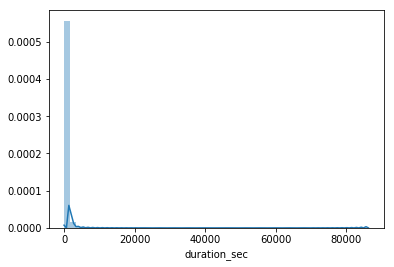

In [8]:
sns.distplot(df["duration_sec"]);

Clearly the data is massively skewed towards smaller trip durations and these outlying trip durations prevent us from understanding the bulk of the data. Also, viewing in terms of seconds is not intuitive, feature engineer a duration_min column and plot accordingly.

In [9]:
df['duration_min'] = df['duration_sec']/60

In [10]:
# confirm accurate calculation
df.head(1)

,bike_id,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,user_type,bike_share_for_all_trip,member_gender,member_birth_year,duration_min
0,1035,598,2018-02-28 23:59:47.097,2018-03-01 00:09:45.187,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114,Rhode Island St at 17th St,37.764478,-122.40257,Subscriber,No,Male,1988,9.966667


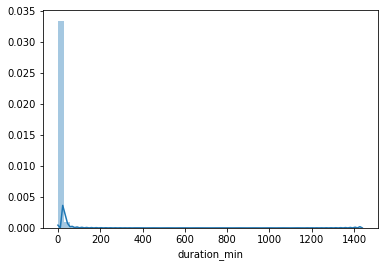

In [11]:
# re-plot histogram
sns.distplot(df["duration_min"]);

Considering that bike rentals for customers are priced according to a 30 min limit and subscribers at a 45 min limit, we will focus on a 2 hour trip duration max. This is a reasonable range based on the pricing and how long the bulk of trip durations are.

#### Histogram of durations with corrections

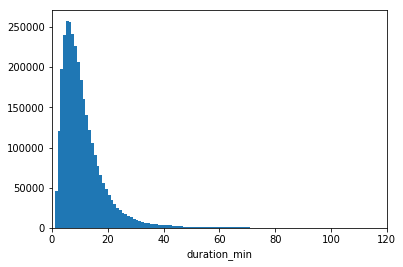

In [12]:
bin_edges = np.arange(0, df['duration_min'].max()+1, 1)
sns.distplot(df['duration_min'], bins = bin_edges, kde = False,
            hist_kws = {'alpha' : 1})
plt.xlim((0,120));

#### Birth year distribution

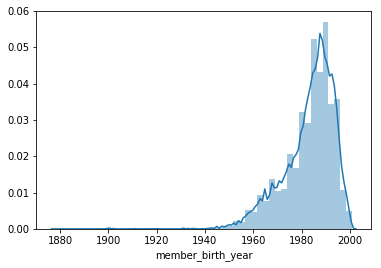

In [13]:
sns.distplot(df["member_birth_year"]);

We need to filter out impossible and unreasonable birth years.

The oldest living Californian is 112, so it is impossible for someone to be born before 1907. Additionally, we will drop riders above the age of 85 from our dataset for the sake of focusing on the most important trips and riders. It is possible that someone 85+ is using the bikes, but highly unlikely. Therefore this very small portion of the data can be assumed unreliable.

In [14]:
df = df.query('member_birth_year > 1906')
df.head()

,bike_id,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,user_type,bike_share_for_all_trip,member_gender,member_birth_year,duration_min
0,1035,598,2018-02-28 23:59:47.097,2018-03-01 00:09:45.187,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114,Rhode Island St at 17th St,37.764478,-122.402570,Subscriber,No,Male,1988,9.966667
1,1673,943,2018-02-28 23:21:16.495,2018-02-28 23:36:59.974,6,The Embarcadero at Sansome St,37.804770,-122.403234,324,Union Square (Powell St at Post St),37.788300,-122.408531,Customer,No,Male,1987,15.716667
2,3498,18587,2018-02-28 18:20:55.190,2018-02-28 23:30:42.925,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,Customer,No,Female,1986,309.783333
3,3129,18558,2018-02-28 18:20:53.621,2018-02-28 23:30:12.450,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,Customer,No,Male,1981,309.300000
4,1839,885,2018-02-28 23:15:12.858,2018-02-28 23:29:58.608,308,San Pedro Square,37.336802,-121.894090,297,Locust St at Grant St,37.322980,-121.887931,Subscriber,Yes,Female,1976,14.750000


In [15]:
len(df)

3195998

#### Birth year distribution with corrections

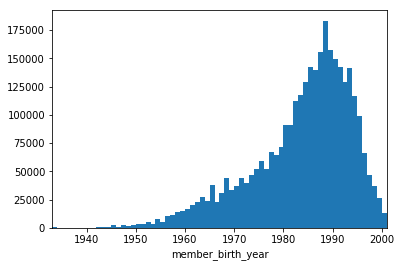

In [16]:
# re-plot birth year distribution after making adjustments
bin_edges = np.arange(0, df['member_birth_year'].max()+1, 1)
sns.distplot(df['member_birth_year'], bins = bin_edges, kde = False,
            hist_kws = {'alpha' : 1})
plt.xlim((1933,2001));

In [17]:
df.member_birth_year.describe()

count    3.195998e+06
mean     1.983232e+03
std      1.026730e+01
min      1.907000e+03
25%      1.978000e+03
50%      1.986000e+03
75%      1.991000e+03
max      2.001000e+03
Name: member_birth_year, dtype: float64

Plotting by birth year doesn't feel right, it would be more intuitive to plot by age so that age increases from left to right. This will prevent potential misinterpretations by audiences.

In [18]:
df['age'] = 2019-df['member_birth_year']

In [19]:
# confirm accurate calculation
df.head(1)

,bike_id,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,user_type,bike_share_for_all_trip,member_gender,member_birth_year,duration_min,age
0,1035,598,2018-02-28 23:59:47.097,2018-03-01 00:09:45.187,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114,Rhode Island St at 17th St,37.764478,-122.40257,Subscriber,No,Male,1988,9.966667,31


#### Plot by age instead of birth year

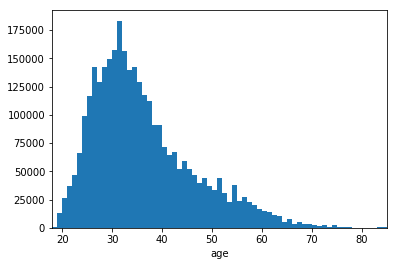

In [20]:
# re-plot birth year distribution using age variable
bin_edges = np.arange(0, df['age'].max()+1, 1)
sns.distplot(df['age'], bins = bin_edges, kde = False,
            hist_kws = {'alpha' : 1})
plt.xlim((18,85));

Now that I have an accurate idea of the trip duration and user age distributions to focus on, I want to further analyze according to user types.

#### Count of trips by user type
2 types: subscribers who are members paying a monthly or annual fee and customers who are single-use users.

How many trips is each type responsible for?

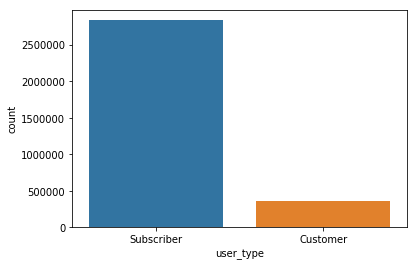

In [21]:
sns.countplot(data = df, x = 'user_type');

There is clearly a much larger number of of trips from subscribers than customers. What are the average trip durations of each of these 2 user types? If there is a much larger count of trips, does this mean there are more frequent short trips or simply the same trips as customers but more trips in general?

#### Average trip duration by user type

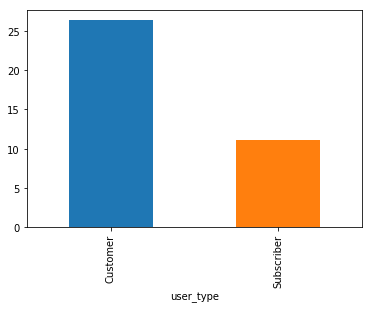

In [22]:
df.groupby("user_type")['duration_min'].mean().plot(kind='bar')

Customers appear to have a much higher average trip duration than subscribers.

My initial thoughts after seeing the above 2 plots are that subscribers use Ford GoBike for practical, consistent use, such a daily commutes, while customers are using bikes for leisurely activity and to explore the city (maybe visitors from out of town).

Let's see if the distributions of ride durations for subscribers and customers support this.

Later in the analysis, we will also look into day of the week. I would expect leisurely rides F-Su and practical rides M-Th.

In [23]:
df_subscriber = df.query('user_type == "Subscriber"')
df_customer = df.query('user_type == "Customer"')

In [24]:
# Confirm subscriber df is proper length, over 2500000
len(df_subscriber)

2833679

In [25]:
# Confirm customer df is proper length, over 350000
len(df_customer)

362319

### Subscribers' durations

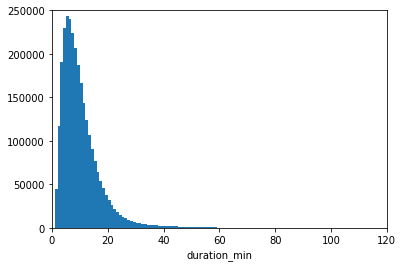

In [27]:
bin_edges = np.arange(0, df['duration_min'].max()+1, 1)
sns.distplot(df_subscriber['duration_min'], bins = bin_edges, kde = False,
            hist_kws = {'alpha' : 1})
plt.xlim((0,120));
plt.ylim((0,250000));

### Customers' durations

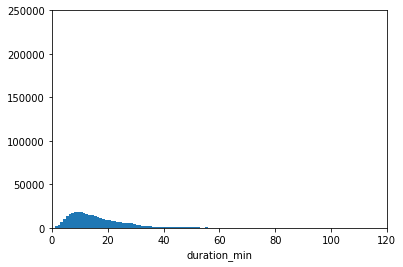

In [29]:
bin_edges = np.arange(0, df['duration_min'].max()+1, 1)
sns.distplot(df_customer['duration_min'], bins = bin_edges, kde = False,
            hist_kws = {'alpha' : 1})
plt.xlim((0,120));
plt.ylim((0,250000));

### Plot these next to each other to better compare

(0, 250000)

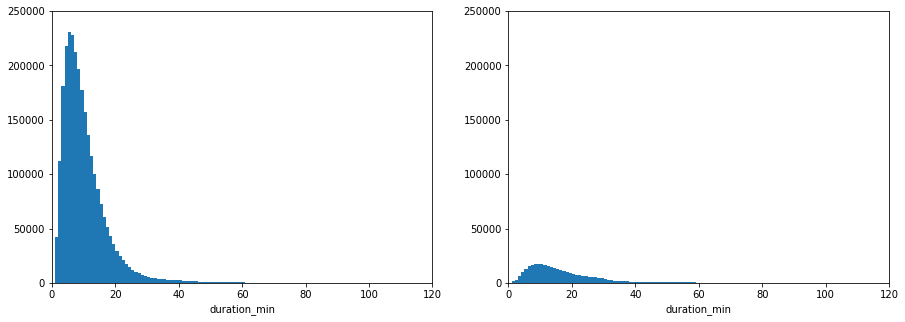

In [80]:
plt.figure(figsize = [15, 5]) # larger figure size for subplots

# example of somewhat too-large bin size
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bin_edges = np.arange(0, df['duration_min'].max()+1, 1)
sns.distplot(df_subscriber['duration_min'], bins = bin_edges, kde = False,
            hist_kws = {'alpha' : 1})
plt.xlim((0,120))
plt.ylim((0,250000))

# example of somewhat too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bin_edges = np.arange(0, df['duration_min'].max()+1, 1)
sns.distplot(df_customer['duration_min'], bins = bin_edges, kde = False,
            hist_kws = {'alpha' : 1})
plt.xlim((0,120))
plt.ylim((0,250000))

We can see that the two user types have relatively similar skews (skewed towards smaller values) and the higher peak for Subscribers could explain why their average is shorter, however this alone doesn't explain such a large difference. It seems as though the height to width ratio of the distributions could mean the customer distribution has a much longer tail with a higher percentage of trips on the longer end. What if we drill down to analyze the tails of the distributions? I want to check the distributions for durations 50 min or longer.

#### Zoom-in on tail of each distribution

(0, 2000)

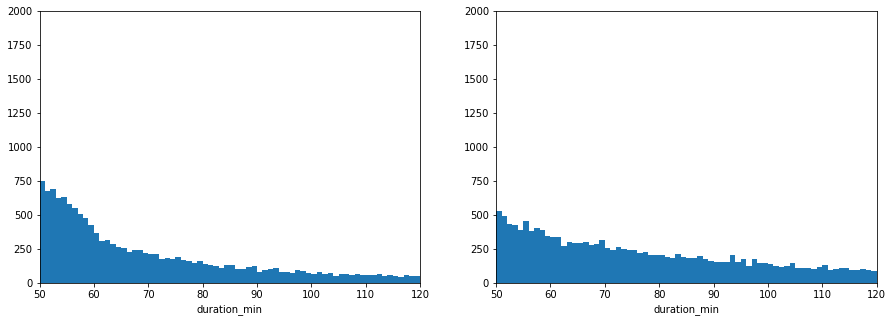

In [83]:
plt.figure(figsize = [15, 5]) # larger figure size for subplots

# example of somewhat too-large bin size
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bin_edges = np.arange(0, df['duration_min'].max()+1, 1)
sns.distplot(df_subscriber['duration_min'], bins = bin_edges, kde = False,
            hist_kws = {'alpha' : 1})
plt.xlim((50,120))
plt.ylim((0,2000))

# example of somewhat too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bin_edges = np.arange(0, df['duration_min'].max()+1, 1)
sns.distplot(df_customer['duration_min'], bins = bin_edges, kde = False,
            hist_kws = {'alpha' : 1})
plt.xlim((50,120))
plt.ylim((0,2000))

The above plot makes it clear that the distribution of customer trip durations has a much longer and more gradual tail. This, paired with the higher peak and more extreme skew towards lower durations, explains the large difference in average durations between Subscribers and Customers. The values shown in this plot also further support my claim that single-use customers are using the service for long distance exploration, or are simly traveling at lower speeds due to the leisurely pace of exploring the city.

Now that we have looked into trip duration by user type, it is now time to look into the relationship between age and user type.

### Comparing age by user type

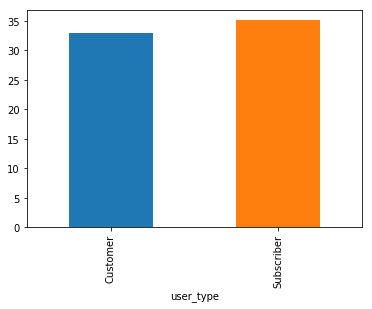

In [84]:
df.groupby("user_type")['age'].mean().plot(kind='bar')

We can see that subscribers are a bit older on average than customers, however this appears to be a very small difference. No more than 3 years.

Let's take a look at the distributions of ages for each user type to see if we can learn more.

### Distribution of ages by user type

(0, 160000)

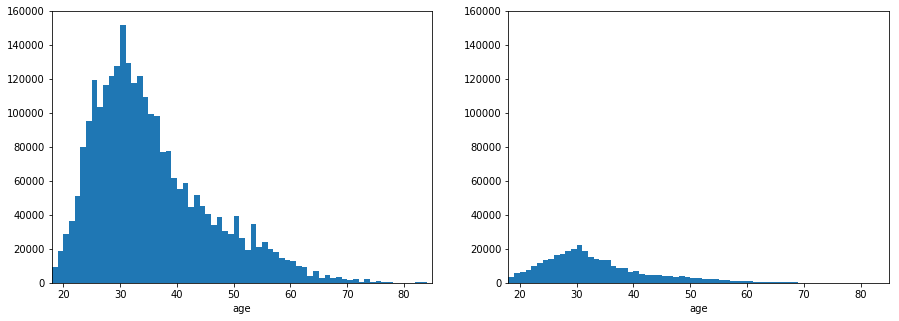

In [89]:
plt.figure(figsize = [15, 5]) # larger figure size for subplots

# example of somewhat too-large bin size
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bin_edges = np.arange(0, df['age'].max()+1, 1)
sns.distplot(df_subscriber['age'], bins = bin_edges, kde = False,
            hist_kws = {'alpha' : 1})
plt.xlim((18,85))
plt.ylim((0,160000))

# example of somewhat too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bin_edges = np.arange(0, df['age'].max()+1, 1)
sns.distplot(df_customer['age'], bins = bin_edges, kde = False,
            hist_kws = {'alpha' : 1})
plt.xlim((18,85))
plt.ylim((0,160000))

The above shows us that both customers and subscribers have very similar distributions with the majoirty around age 30 and a very slight resurgence around 50 years old.

### Number of trips by month of the year and number of trips by month of the year by user type

Feature engineer a new column for month

In [112]:
df['month_of_year'] = df['start_time'].dt.month

In [115]:
df.sample(5)

,bike_id,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,user_type,bike_share_for_all_trip,member_gender,member_birth_year,duration_min,age,month_of_year
2370884,3129,1011,2018-08-11 15:22:44.689,2018-08-11 15:39:35.796,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,11,Davis St at Jackson St,37.797280,-122.398436,Subscriber,No,Female,1996,16.850000,22,8
753495,685,1684,2017-11-13 22:44:44.992,2017-11-13 23:12:49.418,296,5th St at Virginia St,37.325998,-121.877120,296,5th St at Virginia St,37.325998,-121.877120,Subscriber,Not Offered,Male,1994,28.066667,24,11
876277,1174,805,2017-10-04 20:16:58.981,2017-10-04 20:30:24.303,245,Downtown Berkeley BART,37.870348,-122.267764,167,College Ave at Harwood Ave,37.848152,-122.252160,Subscriber,Not Offered,Male,1993,13.416667,25,10
2327057,414,732,2018-08-19 21:34:28.959,2018-08-19 21:46:41.026,193,Grand Ave at Santa Clara Ave,37.812744,-122.247215,233,E 12th St at 4th Ave,37.795812,-122.255555,Subscriber,No,Male,1969,12.200000,49,8
482259,3214,277,2018-09-26 10:03:33.178,2018-09-26 10:08:10.511,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,17,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,Subscriber,No,Male,1974,4.616667,44,9


#### Number of trips by month of the year

Since 2018 is the only year with a full 12 months worth of data, we will remove data from the end of 2017 and the beginning of 2019 because the sum total count of trips by month will be skewed in favor of the months with a higher quantity of data collected.

In [123]:
df_2018 = df.copy()

In [124]:
df_2018['year'] = df_2018['start_time'].dt.year

In [125]:
df_2018.sample(5)

,bike_id,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,user_type,bike_share_for_all_trip,member_gender,member_birth_year,duration_min,age,month_of_year,year
846163,1194,1307,2017-10-15 18:27:24.427,2017-10-15 18:49:11.523,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,44,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,Customer,Not Offered,Female,1994,21.783333,24,10,2017
1748458,919,398,2018-12-12 18:47:05.045,2018-12-12 18:53:43.546,248,Telegraph Ave at Ashby Ave,37.855956,-122.259795,241,Ashby BART Station,37.852477,-122.270213,Subscriber,No,Male,1973,6.633333,45,12,2018
1923022,5367,444,2019-01-28 08:54:44.037,2019-01-28 09:02:08.583,22,Howard St at Beale St,37.789756,-122.394643,6,The Embarcadero at Sansome St,37.804770,-122.403234,Subscriber,No,Male,1976,7.400000,42,1,2019
1658123,796,384,2018-05-03 19:22:13.577,2018-05-03 19:28:37.949,127,Valencia St at 21st St,37.756708,-122.421025,125,20th St at Bryant St,37.759200,-122.409851,Subscriber,No,Other,1970,6.400000,48,5,2018
725535,1688,702,2017-11-24 20:50:48.321,2017-11-24 21:02:31.172,120,Mission Dolores Park,37.761420,-122.426435,41,Golden Gate Ave at Polk St,37.781270,-122.418740,Subscriber,Not Offered,Male,1990,11.700000,28,11,2017


In [127]:
df_2018 = df_2018.query('year == 2018')

In [128]:
len(df_2018)

1740680

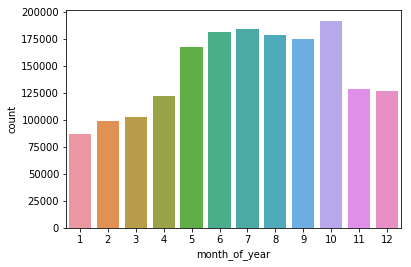

In [129]:
sns.countplot(data = df_2018, x = 'month_of_year');

#### What is the total number of trips by month of the year for each user type?

First, add month and year columns to the subscriber and customer datasets. Then remove all non-2018 rows.

In [130]:
df_subscriber['month_of_year'] = df['start_time'].dt.month
df_customer['month_of_year'] = df['start_time'].dt.month

/Users/mattames/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/mattames/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [131]:
df_subscriber['year'] = df_subscriber['start_time'].dt.year
df_customer['year'] = df_customer['start_time'].dt.year

/Users/mattames/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/mattames/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [132]:
df_subscriber_2018 = df_subscriber.query('year == 2018')
df_customer_2018 = df_customer.query('year == 2018')

In [133]:
len(df_subscriber_2018)

1541624

In [134]:
len(df_customer_2018)

199056

#### Number of trips by month of the year for each user type

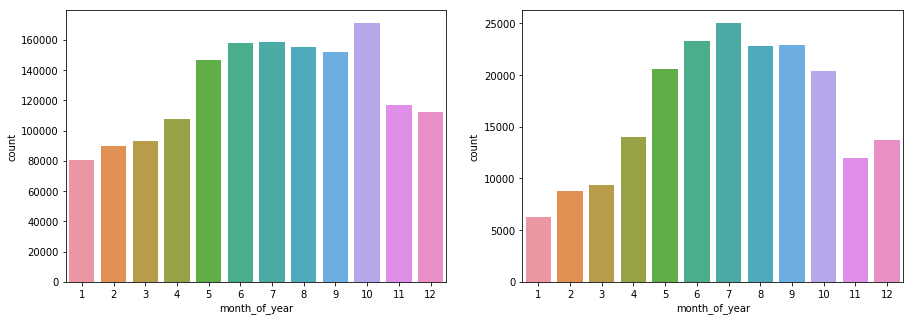

In [138]:
plt.figure(figsize = [15, 5]) # larger figure size for subplots

# example of somewhat too-large bin size
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
sns.countplot(data = df_subscriber_2018, x ='month_of_year');

# example of somewhat too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
sns.countplot(data = df_customer_2018, x ='month_of_year');


As expected, I would think rides fluctuate the most due to weather conditions.

The plot on the left for subscribers shows that there are indeed more rides during the fair and warm weather months, however the percentage decrease from summer to winter is much less, which explains the belief that subscribers use the bikes for practicality.

The plot on the right shows that there are also more rides in the summer, but a larger percent decrease in the winter. This not only lines up with warmer weather in the summer when people are more likely to take leisurely rides, but it also supports the belief that many single-use customers are visitors from out of town because the most popular months for travel in the US are indeed the summer months.

Additionally, the trend for total trip counts regardless of user type more accurately reflect the subscribers trend because of how many more subscribers there are (note the axis labels, subscribers y-axis extends to over 160000 while the customers y-axis extends to only 25000).

## Save all datasets so the final presentation can be completed in a separate Jupyter Notebook

In [139]:
df.to_csv('df.csv', index=False)
df_subscriber.to_csv('df_subscriber.csv', index=False)
df_customer.to_csv('df_customer.csv', index=False)
df_2018.to_csv('df_2018.csv', index=False)
df_subscriber_2018.to_csv('df_subscriber_2018.csv', index=False)
df_customer_2018.to_csv('df_customer_2018.csv', index=False)